In [1]:
import numpy as np
import pandas as pd 
import tushare as ts
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import talib as ta
%matplotlib inline
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.sans-serif'] = ['SimHei']

### 数据准备

In [2]:
stock_index = ts.get_k_data('hs300','2018-01-01','2019-05-31')           #获取数据

In [3]:
stock_index['date'] = pd.to_datetime(stock_index['date'])            #将date转换为datetime格式

In [4]:
stock_index.set_index('date',inplace=True)
stock_index.head()

,open,close,high,low,volume,code
date,,,,,,
2018-01-02,4045.21,4087.40,4087.78,4045.21,146935435.0,hs300
2018-01-03,4091.46,4111.39,4140.05,4088.73,151852218.0,hs300
2018-01-04,4114.12,4128.81,4137.64,4105.89,134543794.0,hs300
2018-01-05,4133.34,4138.75,4151.28,4123.28,149009872.0,hs300
2018-01-08,4140.85,4160.16,4166.32,4127.31,173877666.0,hs300


In [9]:
ta.BBANDS?     #查看方法对应的参数以及输出

In [6]:
# 计算布林线 
stock_index['upper'], stock_index['middle'], stock_index['lower'] = ta.BBANDS(np.asarray(stock_index['close']), 
                                                                              timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)

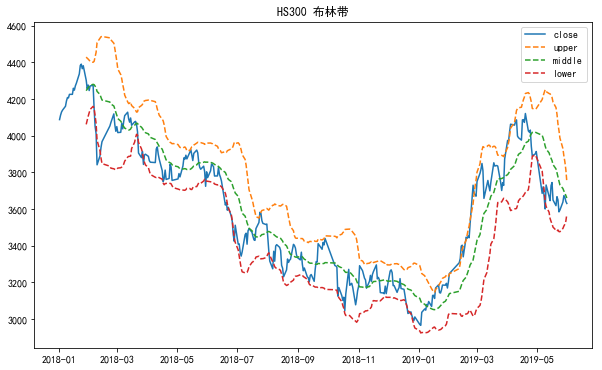

In [10]:
# 绘图 
fig = plt.figure(figsize=(10,6))
plt.plot(stock_index['close'])
plt.plot(stock_index['upper'], linestyle='--')
plt.plot(stock_index['middle'], linestyle='--')
plt.plot(stock_index['lower'], linestyle='--')
plt.title('HS300 布林带')
plt.legend()
plt.show()

## 交易信号和持仓信号的计算

In [11]:
# 计算昨天数据
stock_index['yes_close'] = stock_index['close'].shift(1)
stock_index['yes_upper'] = stock_index['upper'].shift(1)
stock_index['yes_lower'] = stock_index['lower'].shift(1)
# 计算前天的数据 
stock_index['daybeforeyes_close'] = stock_index['close'].shift(2)
stock_index['daybeforeyes_upper'] = stock_index['upper'].shift(2)
stock_index['daybeforeyes_lower'] = stock_index['lower'].shift(2)

In [13]:
stock_index.tail()

,open,close,high,low,volume,code,upper,middle,lower,yes_close,yes_upper,yes_lower,daybeforeyes_close,daybeforeyes_upper,daybeforeyes_lower
date,,,,,,,,,,,,,,,
2019-05-27,3592.60,3637.20,3648.03,3556.26,108830871.0,hs300,3929.831464,3711.5120,3493.192536,3593.91,3986.721945,3475.591055,3583.96,4028.656326,3476.166674
2019-05-28,3633.02,3672.26,3683.23,3627.79,117886240.0,hs300,3889.440770,3698.0340,3506.627230,3637.20,3929.831464,3493.192536,3593.91,3986.721945,3475.591055
2019-05-29,3642.54,3663.91,3693.23,3637.35,93355441.0,hs300,3857.198767,3686.7660,3516.333233,3672.26,3889.440770,3506.627230,3637.20,3929.831464,3493.192536
2019-05-30,3648.85,3641.18,3650.97,3612.62,94202561.0,hs300,3814.056285,3673.8085,3533.560715,3663.91,3857.198767,3516.333233,3672.26,3889.440770,3506.627230
2019-05-31,3641.00,3629.79,3668.18,3627.54,89222267.0,hs300,3747.904607,3659.6375,3571.370393,3641.18,3814.056285,3533.560715,3663.91,3857.198767,3516.333233


In [16]:
# 计算交易信号
# 开多信号：前天收盘价低于下轨，昨日收盘价高于上轨
stock_index['signal'] = np.where(np.logical_and(stock_index['daybeforeyes_close']<stock_index['yes_lower'], 
                                                stock_index['yes_close']>stock_index['yes_lower']), 1, 0)
#计算开空信号：前天收盘价大于上轨，昨日收盘价低于上轨
stock_index['signal'] = np.where(np.logical_and(stock_index['daybeforeyes_close']>stock_index['yes_upper'],
                                               stock_index['yes_close']<stock_index['yes_upper']), -1, stock_index['signal'])

In [17]:
stock_index.tail()

,open,close,high,low,volume,code,upper,middle,lower,yes_close,yes_upper,yes_lower,daybeforeyes_close,daybeforeyes_upper,daybeforeyes_lower,signal
date,,,,,,,,,,,,,,,,
2019-05-27,3592.60,3637.20,3648.03,3556.26,108830871.0,hs300,3929.831464,3711.5120,3493.192536,3593.91,3986.721945,3475.591055,3583.96,4028.656326,3476.166674,0
2019-05-28,3633.02,3672.26,3683.23,3627.79,117886240.0,hs300,3889.440770,3698.0340,3506.627230,3637.20,3929.831464,3493.192536,3593.91,3986.721945,3475.591055,0
2019-05-29,3642.54,3663.91,3693.23,3637.35,93355441.0,hs300,3857.198767,3686.7660,3516.333233,3672.26,3889.440770,3506.627230,3637.20,3929.831464,3493.192536,0
2019-05-30,3648.85,3641.18,3650.97,3612.62,94202561.0,hs300,3814.056285,3673.8085,3533.560715,3663.91,3857.198767,3516.333233,3672.26,3889.440770,3506.627230,0
2019-05-31,3641.00,3629.79,3668.18,3627.54,89222267.0,hs300,3747.904607,3659.6375,3571.370393,3641.18,3814.056285,3533.560715,3663.91,3857.198767,3516.333233,0


Text(0.5, 0.98, 'HS300 Bollinger交易信号图')

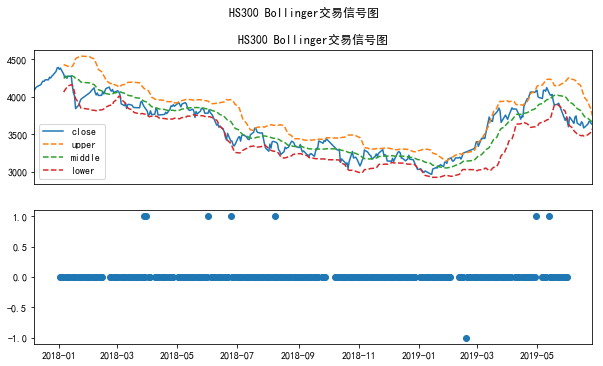

In [21]:
# 绘制交易信号   交易信号和持仓position分开
plt.subplot(2,1,1)
plt.title('HS300 Bollinger交易信号图')
plt.gca().axes.get_xaxis().set_visible(False)
stock_index['close'].plot(figsize=(10,6))
plt.plot(stock_index['upper'],linestyle='--')
plt.plot(stock_index['middle'],linestyle='--')
plt.plot(stock_index['lower'],linestyle='--')
plt.legend()
plt.subplot(2,1,2)
plt.plot(stock_index['signal'], marker = 'o', linestyle='')
plt.suptitle('HS300 Bollinger交易信号图')
# plt.show()

In [22]:
#使用持仓Position标记持仓情况，全面的循环法思路
position = 0
for label, item in stock_index.iterrows():   #逐行便利
#     判断交易信号
    if item['signal'] == 1:
        #交易信号为1,则记录仓位为1
        position =1
    elif item['signal'] == -1:
#         交易信号为-1,则记录仓位为-1
        position = -1
    else:
        pass
    #记录每日持仓情况
    stock_index.loc[label, 'position'] = position   #自动往下填充的就是上一个产生的交易信号,在position没有发生变化之前,一直填充之前的position

Text(0.5, 0.98, 'HS300 Bollinger持仓信号图')

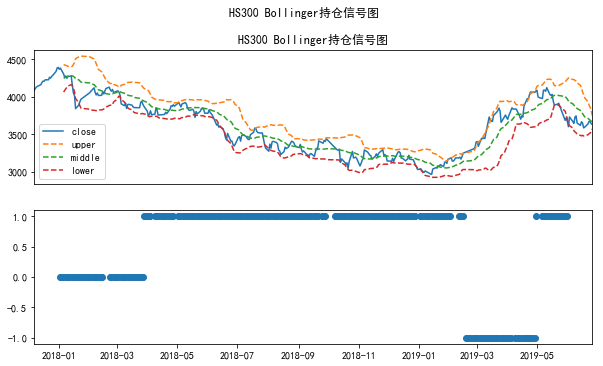

In [23]:
# 绘制持仓信号
plt.subplot(2,1,1)
plt.title('HS300 Bollinger持仓信号图')
plt.gca().axes.get_xaxis().set_visible(False)
stock_index['close'].plot(figsize=(10,6))
plt.plot(stock_index['upper'],linestyle='--')
plt.plot(stock_index['middle'],linestyle='--')
plt.plot(stock_index['lower'],linestyle='--')
plt.legend()
plt.subplot(2,1,2)
plt.plot(stock_index['position'], marker = 'o', linestyle='')
plt.suptitle('HS300 Bollinger持仓信号图')

## 计算收益及可视化

In [24]:
# 计算股票每日收益
stock_index['pct_change'] = stock_index['close'].pct_change()
#计算策略每日收益
stock_index['strategy_return'] = stock_index['pct_change'] * stock_index['position']

In [25]:
#计算股票的累计收益
stock_index['return'] = (stock_index['pct_change']+1).cumprod()
#计算策略累计收益
stock_index['strategy_cum_return'] = (stock_index['strategy_return']+1).cumprod()

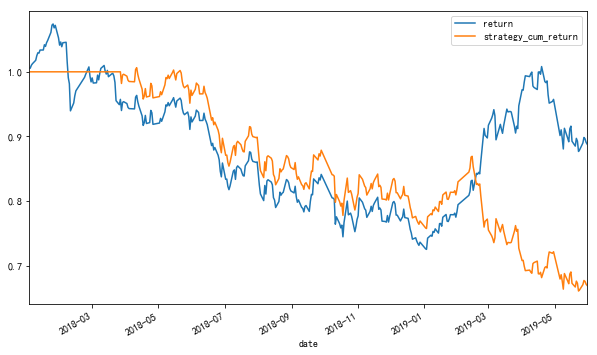

In [26]:
#绘制股票累计收益和策略累计收益
stock_index[['return', 'strategy_cum_return']].plot(figsize=(10,6))